Text(0.5, 1.0, 'Transformed')

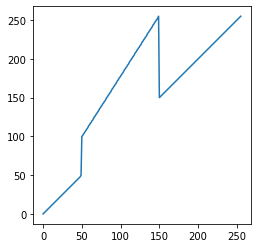

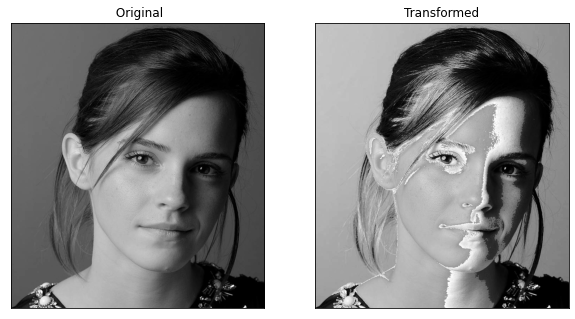

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread('./assingment1_images/emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f, t)


fig,axes = plt.subplots(1,2,sharex= 'all' , sharey='all',figsize = (10,10) )
axes[0].imshow(f, cmap ='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[1].set_title('Transformed')

([], [])

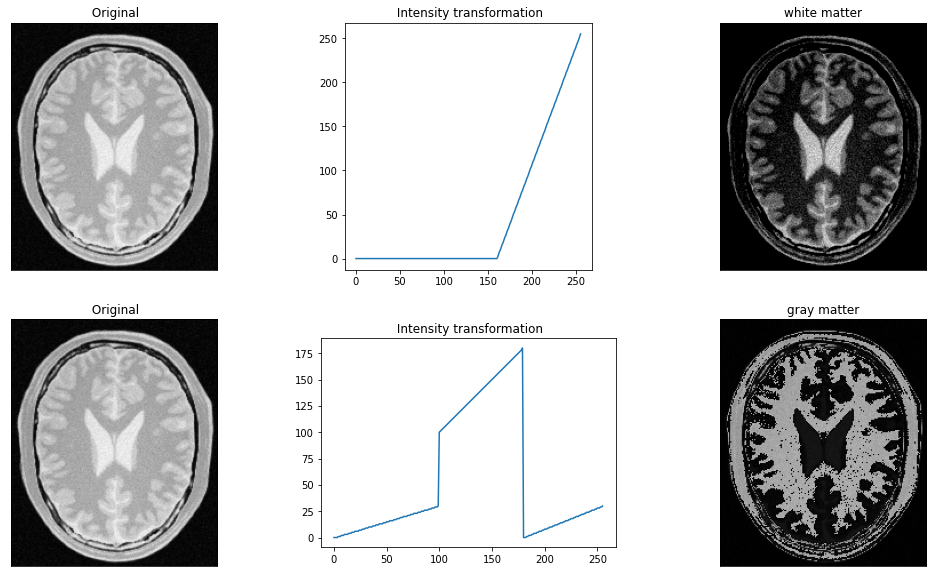

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain = cv.imread('./assingment1_images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,0,160)
t2 = np.linspace(0,255,96)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)
assert len(t) == 256
g = cv.LUT(brain, t)

s1 = np.linspace(0,30,100)
s2 = np.linspace(30,100,0)
s3 = np.linspace(100,180,80)
s4 = np.linspace(0,30,76)
s = np.concatenate((s1,s2,s3,s4),axis=0).astype(np.uint8)
assert len(s) == 256
g1 = cv.LUT(brain, s)



fig,axes = plt.subplots(2,3,figsize = (18,10))

axes[0,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[0,0].set_title(' Original')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].plot(t)
axes[0,1].set_aspect('equal')
axes[0,1].set_title(' Intensity transformation')
axes[0,2].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[0,2].set_title('white matter')
axes[0,2].set_xticks([]),axes[0,2].set_yticks([])

axes[1,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[1,0].set_title(' Original')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].plot(s)
axes[1,1].set_aspect('equal')
axes[1,1].set_title(' Intensity transformation')
axes[1,2].imshow(g1, cmap ='gray',vmin=0,vmax=255)
axes[1,2].set_title('gray matter')
axes[1,2].set_xticks([]),axes[1,2].set_yticks([])

Text(0.5, 1.0, 'Histogram of gamma corrected image')

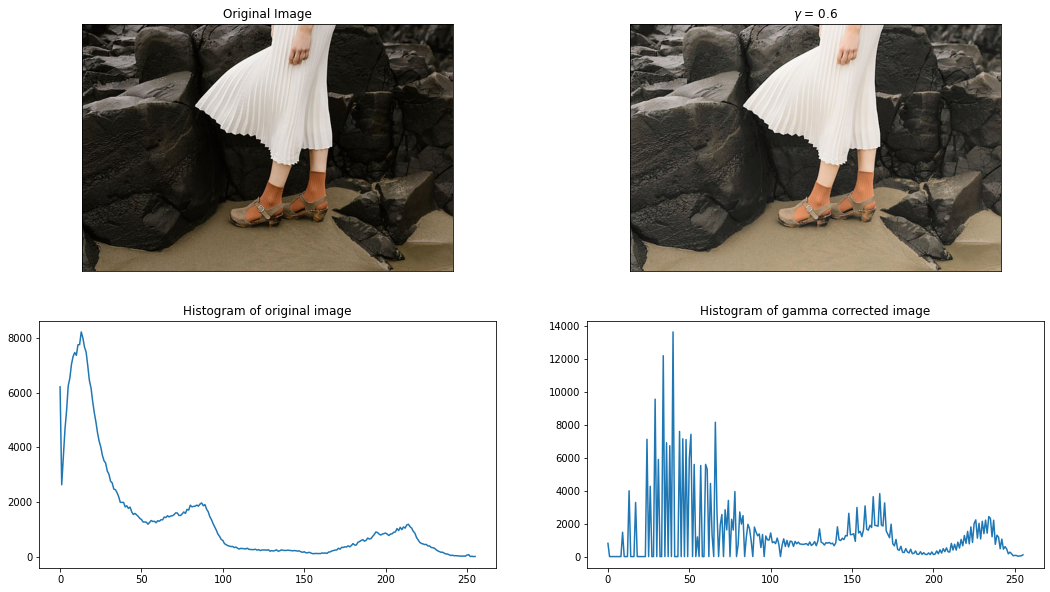

In [54]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
img_orig = cv.imread('./assingment1_images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img_orig is not None

img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
(L,a,b) = cv.split(img_lab)
gamma = 0.6
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
g_transformed = cv.LUT(L, t)
img_lab[:,:,0] = g_transformed

img_orig_hist = cv.calcHist([img_orig],[0],None,[256],[0,256])
img_lab_hist = cv.calcHist([img_lab],[0],None,[256],[0,256])

fig,axes = plt.subplots(2,2,figsize = (18,10))

axes[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].imshow(cv.cvtColor(img_lab, cv.COLOR_Lab2RGB))
axes[0,1].set_title("$\gamma$ = "+ str(gamma))
axes[0,1].set_xticks([]),axes[0,1].set_yticks([])

axes[1,0].plot(img_orig_hist)
axes[1,0].set_title('Histogram of original image')

axes[1,1].plot(img_lab_hist)
axes[1,1].set_title('Histogram of gamma corrected image')



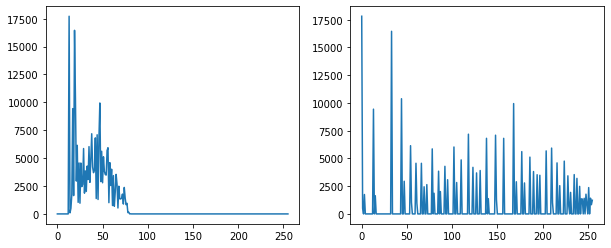

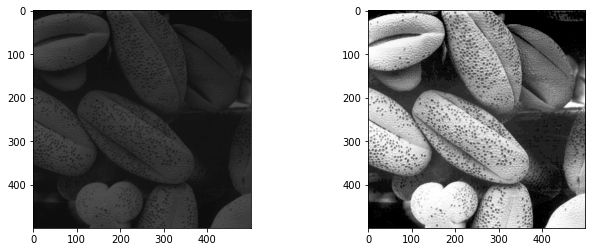

In [69]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('./assingment1_images/shells.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

hist_f = cv.calcHist([img_orig],[0], None,[256],[0,256])
g = cv.equalizeHist(img_orig)
hist_g = cv.calcHist([g],[0], None,[256],[0,256])

fig, ax = plt.subplots(1,2, figsize=(18,10))
ax[0].plot(hist_f)
ax[1].plot(hist_g)

img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
g1 = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize=(1,4))
ax[0].imshow(img_orig1)

ax[1].imshow(g1)